# Plotting measurements of Veritas Demonstrator

In [6]:
%load_ext ipydex.displaytools

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


In [7]:
from sympy.interactive import printing
printing.init_printing()

Symbols of crane:

<img src="crane_values_diagram.png">

### Class for I2C measurements

In [8]:
# class for I2C measurements of single cats
class I2C_Measurements:
    def __init__(self, path_to_data):
        data = pd.read_csv(path_to_data, header=0, skiprows=0)    #Path to measurements
        data = data.to_numpy()

        self.tt = 0.001 * data[:, 0]        # in s
        self.tt = self.tt - self.tt[0]
        self.des_cur = 0.001 * data[:, 1]   # in A
        self.pos = 0.001 * data[:, 2]       # in m
        self.pos = self.pos - self.pos[0]

        self.dt = (np.array(self.tt[-1]) - np.array(self.tt[0]))/ self.tt.size # average sample period in s
        self.vel = np.gradient(self.pos, self.dt)
        self.cur = 0.001 * data[:, 4]       # in A

### PRBS LK1 cat drive

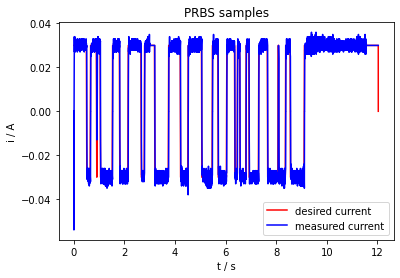

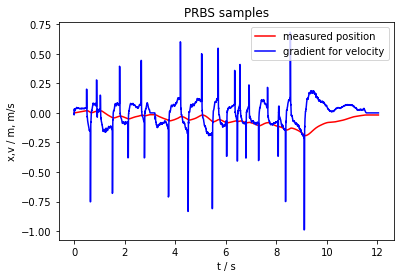

In [9]:
'''
PRBS von I_max = - I_min = 30 mA
Seillänge ab Nadelaustritt: 100 mm + (Offset durch Nadelführung: 40.5 mm)
Last: 100g (~punktförmig)
'''

# path to Veritas repository demonstrator_software, assumded to share the same parent directory with this repository
sample_path = os.path.expanduser('../../demonstrator_software/logs/prbs_for_paramident2/LK1/cat')

sample_set = "rope_100/sample1"
path_string = sample_path + "/" + str(sample_set) + ".csv"
meas = I2C_Measurements(path_string)

plt.figure(1)
plt.plot(meas.tt, meas.des_cur, 'r',label="desired current")
plt.plot(meas.tt, meas.cur, 'b',label="measured current")
plt.legend()
plt.title('PRBS samples')
plt.xlabel('t / s')
plt.ylabel(r'i / A')

plt.figure(2)
plt.plot(meas.tt, meas.pos, 'r',label="measured position")
plt.plot(meas.tt, meas.vel, 'b',label="gradient for velocity")
plt.legend()
plt.title('PRBS samples')
plt.xlabel('t / s')
plt.ylabel(r'x,v / m, m/s')

plt.show()

### PRBS LK1 lift drive

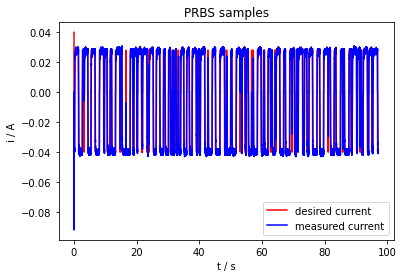

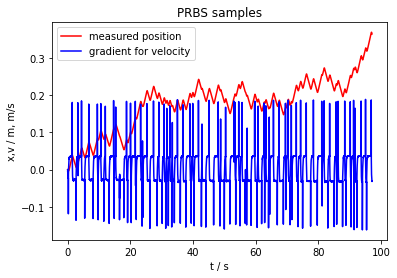

In [10]:
'''
genutzte Masse: 100 g (~punktförmig)
T_PRBS = 1.5 s
positiver Weg / Strom: nach unten
'''

# path to Veritas repository demonstrator_software, assumded to share the same parent directory with this repository
sample_path = os.path.expanduser('../../demonstrator_software/logs/prbs_for_paramident3/LK1/lift')

sample_set = "iu40_id28"
path_string = sample_path + "/" + str(sample_set) + ".csv"
meas = I2C_Measurements(path_string)

plt.figure(1)
plt.plot(meas.tt, meas.des_cur, 'r',label="desired current")
plt.plot(meas.tt, meas.cur, 'b',label="measured current")
plt.legend()
plt.title('PRBS samples')
plt.xlabel('t / s')
plt.ylabel(r'i / A')

plt.figure(2)
plt.plot(meas.tt, meas.pos, 'r',label="measured position")
plt.plot(meas.tt, meas.vel, 'b',label="gradient for velocity")
plt.legend()
plt.title('PRBS samples')
plt.xlabel('t / s')
plt.ylabel(r'x,v / m, m/s')

plt.show()

### Trajectory measurements of whole gantry crane
-> [PlotJuggler](https://github.com/facontidavide/PlotJuggler) on demonstrator_software/logs/traj_samples/...